In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
df = pd.read_csv("datasets/tonnage-decheterie-par-type-dechet-par-dept.csv")
df

,ANNEE,C_REGION,L_REGION,C_DEPT,N_DEPT,C_TYP_REG_DECHET,L_TYP_REG_DECHET,TONNAGE_T
0,2009,84,Auvergne-Rhône-Alpes,01,Ain,02A,Déchets dangereux,1358.45
1,2009,84,Auvergne-Rhône-Alpes,01,Ain,02B,Matériaux recyclables,25404.84
2,2009,84,Auvergne-Rhône-Alpes,01,Ain,02C,Déchets verts,45013.01
3,2009,84,Auvergne-Rhône-Alpes,01,Ain,02D,Encombrants,34728.89
4,2009,84,Auvergne-Rhône-Alpes,01,Ain,02F,DEEE,3366.15
...,...,...,...,...,...,...,...,...
5294,2021,93,Provence-Alpes-Côte d'Azur,84,Vaucluse,02D,Encombrants,34402.19
5295,2021,93,Provence-Alpes-Côte d'Azur,84,Vaucluse,02G,Mobilier,9233.97
5296,2021,93,Provence-Alpes-Côte d'Azur,84,Vaucluse,02F,DEEE,4159.11
5297,2021,93,Provence-Alpes-Côte d'Azur,84,Vaucluse,02E,Déblais et gravats,44275.30


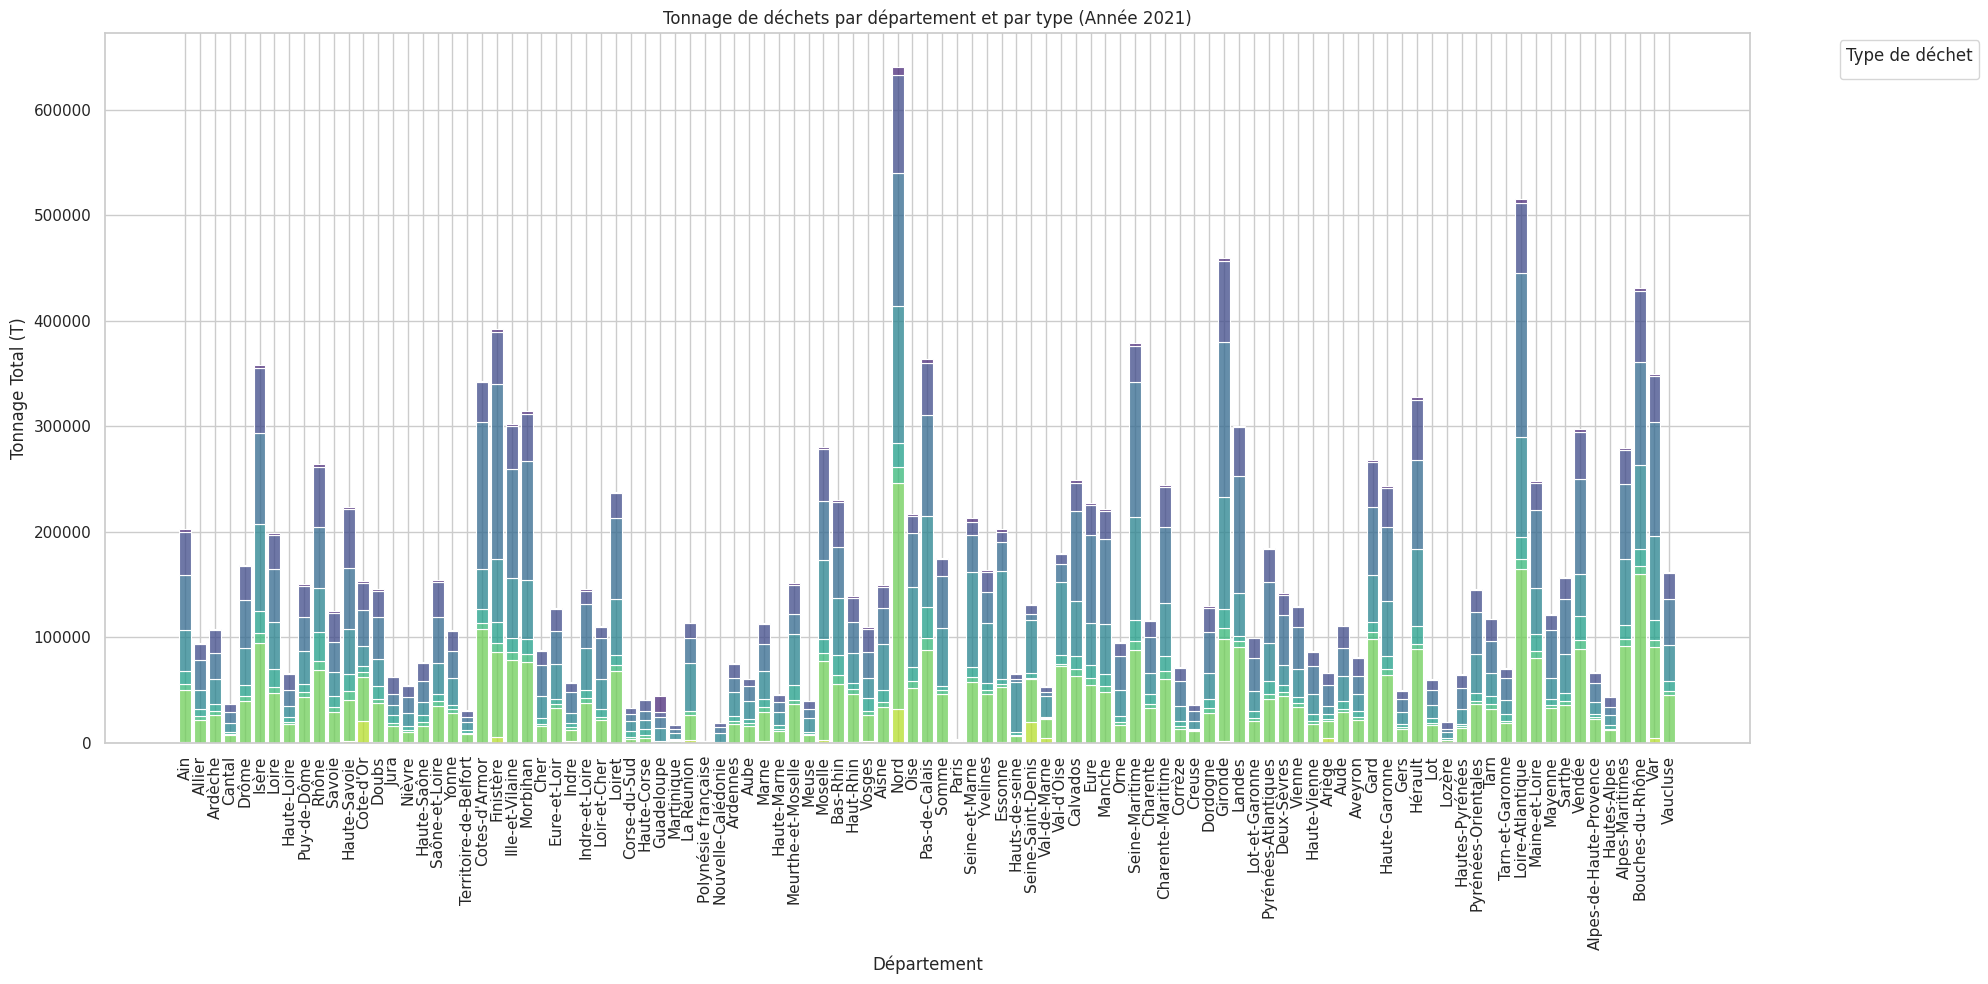

In [14]:
# Filter for the most recent year
df_2021 = df[df['ANNEE'] == 2021].copy()

# Sort departments by total tonnage for better visualization
dept_order = df_2021.groupby('N_DEPT')['TONNAGE_T'].sum().sort_values(ascending=False).index

# Set up the plot
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")

# Create stacked bar chart using histplot (good for categorical + weights)
# Note: histplot with multiple="stack" on categorical x-axis works like a stacked bar chart
ax = sns.histplot(
    data=df_2021,
    x='N_DEPT',
    hue='L_TYP_REG_DECHET',
    weights='TONNAGE_T',
    multiple='stack',
    palette='viridis',
    shrink=0.8
)

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Département')
plt.ylabel('Tonnage Total (T)')
plt.title('Tonnage de déchets par département et par type (Année 2021)')
plt.legend(title='Type de déchet', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('stacked_waste_tonnage.png')

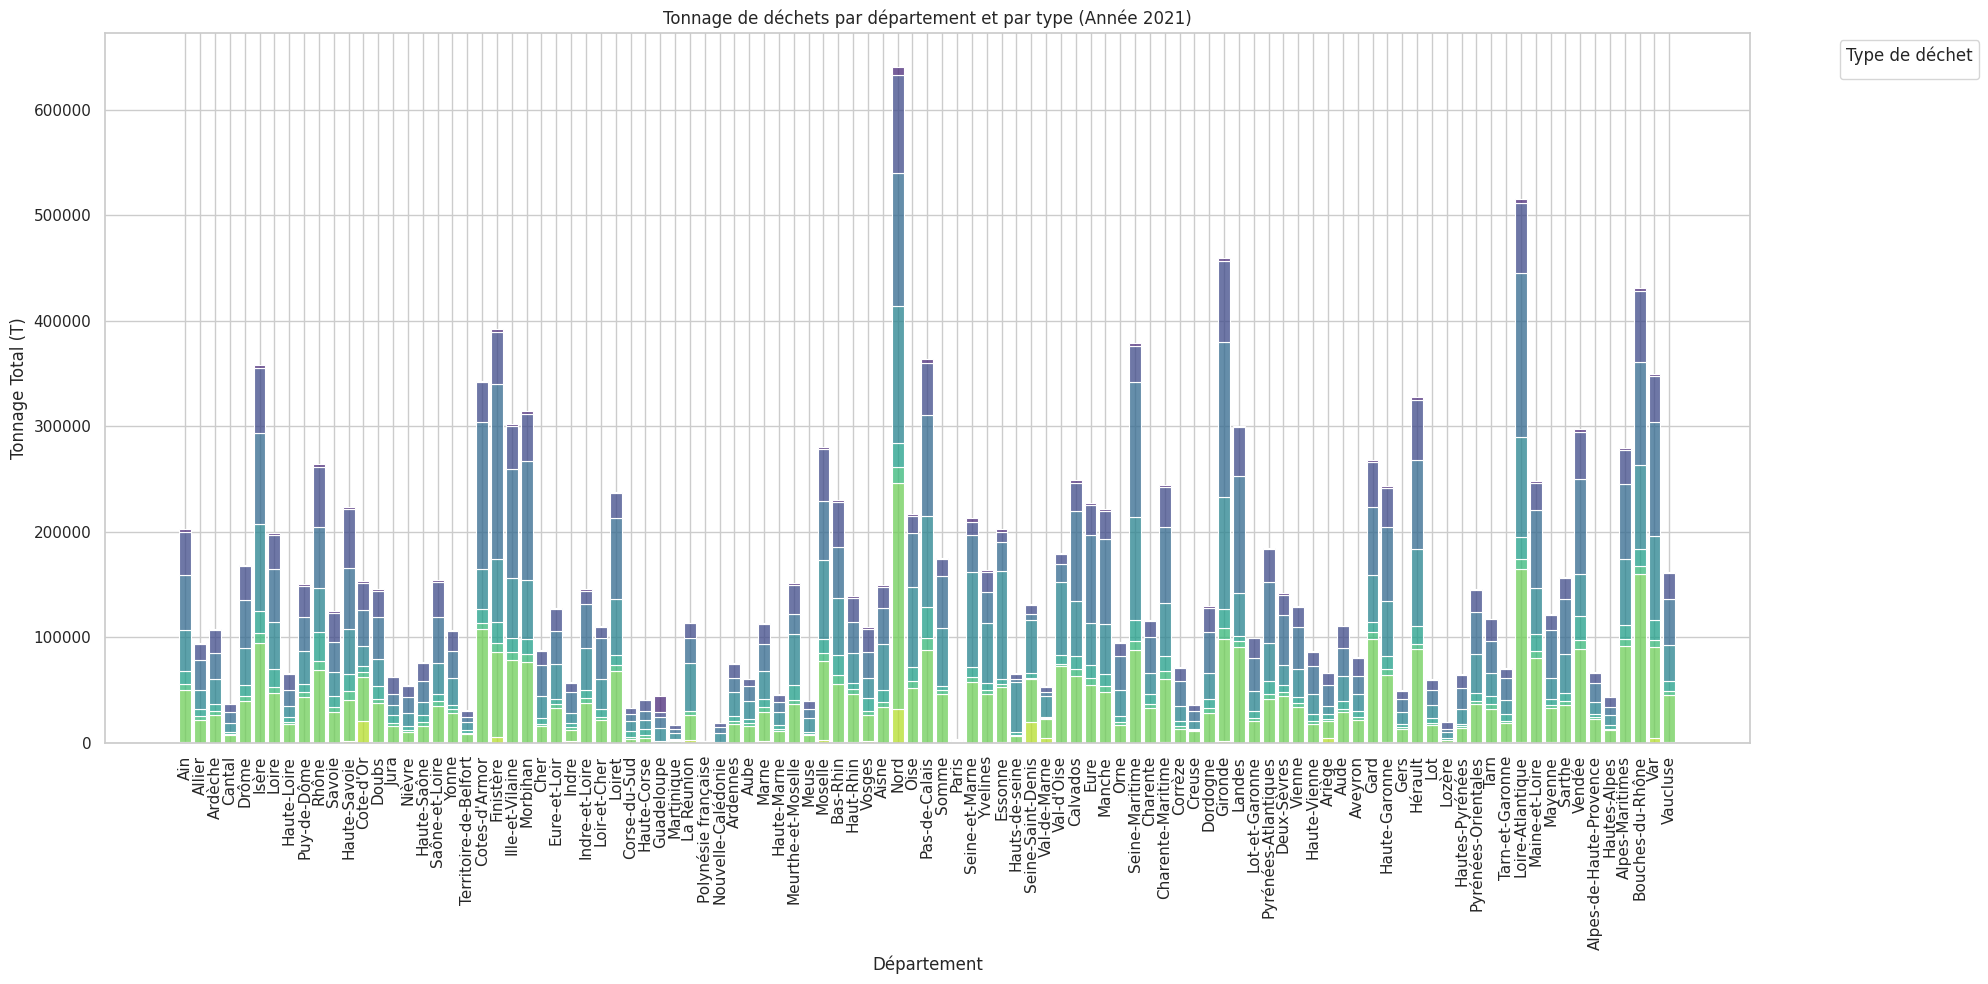

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the most recent year
df_2021 = df[df['ANNEE'] == 2021].copy()

# Sort departments by total tonnage for better visualization
dept_order = df_2021.groupby('N_DEPT')['TONNAGE_T'].sum().sort_values(ascending=False).index

# Set up the plot
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")

# Create stacked bar chart using histplot (good for categorical + weights)
# Note: histplot with multiple="stack" on categorical x-axis works like a stacked bar chart
ax = sns.histplot(
    data=df_2021,
    x='N_DEPT',
    hue='L_TYP_REG_DECHET',
    weights='TONNAGE_T',
    multiple='stack',
    palette='viridis',
    shrink=0.8
)

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Département')
plt.ylabel('Tonnage Total (T)')
plt.title('Tonnage de déchets par département et par type (Année 2021)')
plt.legend(title='Type de déchet', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('stacked_waste_tonnage.png')